In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg as la
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.preprocessing import StandardScaler

In [3]:
## (1)
catergories=['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos'
             ,'rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

all_classes=fetch_20newsgroups(subset='all', categories=catergories, shuffle=True, random_state=42)
vect=CountVectorizer(stop_words='english',min_df=3)
count=vect.fit_transform(all_classes.data)
trans=TfidfTransformer()
tfid=trans.fit_transform(count)
print (tfid.shape)


(7882, 27768)


In [7]:
#### (2)
train_labels= [int(x/4) for x in all_classes.target]
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(tfid)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

Homogeneity: 0.253
Completeness: 0.335
V-measure: 0.288
Adjusted rand score: 0.181
Adjusted mutual info score: 0.253
[[   4 3899]
 [1717 2262]]


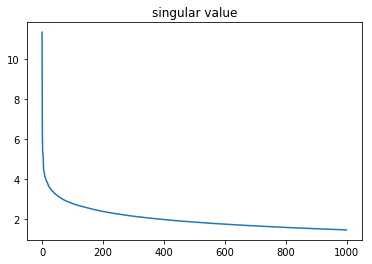

In [14]:
##(3) (a) (i)
U,s,V=la.svds(tfid,k=1000)
plt.figure()
plt.plot(s[::-1])
plt.title('singular value')
plt.show()

r =  1 

Homo_score:  0.00029929908715
Comp_score:  0.000304080277198
V_measure:  0.000301670739052
adjusted_rand:  0.000339090736162
adjusted_mutual:  0.000207775691586
contingency matrix:
[[2200 1703]
 [2323 1656]]


r =  2 

Homo_score:  0.592652202011
Comp_score:  0.593362948406
V_measure:  0.593007362243
adjusted_rand:  0.696027975915
adjusted_mutual:  0.592614909191
contingency matrix:
[[3678  225]
 [ 428 3551]]


r =  3 

Homo_score:  0.38903658255
Comp_score:  0.42956771264
V_measure:  0.408298749179
adjusted_rand:  0.378550009418
adjusted_mutual:  0.388980646594
contingency matrix:
[[3869   34]
 [1482 2497]]


r =  5 

Homo_score:  0.21890972886
Comp_score:  0.307852788876
V_measure:  0.255872307814
adjusted_rand:  0.142077495525
adjusted_mutual:  0.218838209019
contingency matrix:
[[3898    5]
 [2450 1529]]


r =  20 

Homo_score:  0.237652028811
Comp_score:  0.323497883265
V_measure:  0.274008519362
adjusted_rand:  0.161245952319
adjusted_mutual:  0.237582226313
contingency 

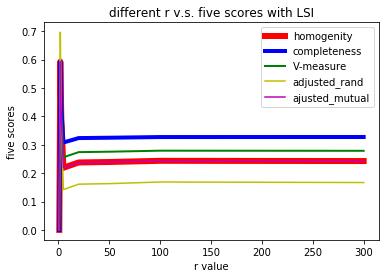

In [12]:
## (3) (a) (ii)
## show K-means results on TruncatedSVD
Homo_score=[]
Comp_score=[]
V_measure=[]
adjusted_rand=[]
adjusted_mutual=[]
rs= [1,2,3,5,20,50,100,300]
index = 0
for r in rs:
    LSI=TruncatedSVD(n_components=r)
    LSI_data=LSI.fit_transform(tfid)
    km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
    km.fit(LSI_data)
    Homo_score.append(metrics.homogeneity_score(train_labels, km.labels_))
    Comp_score.append(metrics.completeness_score(train_labels, km.labels_))
    V_measure.append(metrics.v_measure_score(train_labels, km.labels_))
    adjusted_rand.append(metrics.adjusted_rand_score(train_labels, km.labels_))
    adjusted_mutual.append(metrics.adjusted_mutual_info_score(train_labels, km.labels_))
    contingency=contingency_matrix(train_labels, km.labels_)
    print('r = ', r, '\n');
    print('Homo_score: ', Homo_score[index])
    print('Comp_score: ', Comp_score[index])
    print('V_measure: ', V_measure[index])
    print('adjusted_rand: ', adjusted_rand[index])
    print('adjusted_mutual: ', adjusted_mutual[index])
    print ('contingency matrix:')
    print (contingency)
    index += 1
    print('\n')


    
plt.figure()
plt.plot(rs,Homo_score,'r',label='homogenity',lw=6)
plt.plot(rs,Comp_score,'b',label='completeness',lw=4)
plt.plot(rs,V_measure,'g',label='V-measure',lw=2)
plt.plot(rs,adjusted_rand,'y',label='adjusted_rand')
plt.plot(rs,adjusted_mutual,'m',label='ajusted_mutual')
plt.legend(loc='best')
plt.xlabel('r value')
plt.ylabel('five scores')
plt.title('different r v.s. five scores with LSI')
plt.show()

r =  1 

Homo_score:  0.00029929908715
Comp_score:  0.000304080277198
V_measure:  0.000301670739052
adjusted_rand:  0.000339090736162
adjusted_mutual:  0.000207775691586
contingency matrix:
[[2200 1703]
 [2323 1656]]


r =  2 

Homo_score:  0.67904835623
Comp_score:  0.68013160921
V_measure:  0.679589551049
adjusted_rand:  0.777017778838
adjusted_mutual:  0.679018973001
contingency matrix:
[[3594  309]
 [ 158 3821]]


r =  3 

Homo_score:  0.229342703311
Comp_score:  0.316483956939
V_measure:  0.265957277374
adjusted_rand:  0.152797450114
adjusted_mutual:  0.229272139479
contingency matrix:
[[   4 3899]
 [1583 2396]]


r =  5 

Homo_score:  0.180630685812
Comp_score:  0.278708796538
V_measure:  0.219198928004
adjusted_rand:  0.101955671879
adjusted_mutual:  0.180555656934
contingency matrix:
[[3898    5]
 [2677 1302]]


r =  20 

Homo_score:  0.18327248346
Comp_score:  0.269994953975
V_measure:  0.218337527252
adjusted_rand:  0.114477346436
adjusted_mutual:  0.183197698564
contingency 

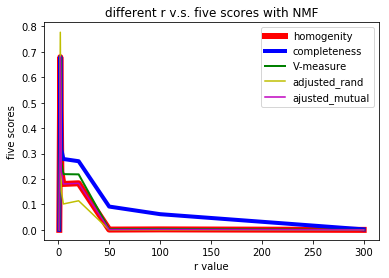

In [15]:
## show K-means results on MNF
Homo_score=[]
Comp_score=[]
V_measure=[]
adjusted_rand=[]
adjusted_mutual=[]
rs= [1,2,3,5,20,50,100,300]
index = 0
for r in rs:
    NMF_model=NMF(n_components=r,random_state=0)
    NMF_data=NMF_model.fit_transform(tfid)
    km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
    km.fit(NMF_data)
    Homo_score.append(metrics.homogeneity_score(train_labels, km.labels_))
    Comp_score.append(metrics.completeness_score(train_labels, km.labels_))
    V_measure.append(metrics.v_measure_score(train_labels, km.labels_))
    adjusted_rand.append(metrics.adjusted_rand_score(train_labels, km.labels_))
    adjusted_mutual.append(metrics.adjusted_mutual_info_score(train_labels, km.labels_))
    contingency=contingency_matrix(train_labels, km.labels_)
    print('r = ', r, '\n');
    print('Homo_score: ', Homo_score[index])
    print('Comp_score: ', Comp_score[index])
    print('V_measure: ', V_measure[index])
    print('adjusted_rand: ', adjusted_rand[index])
    print('adjusted_mutual: ', adjusted_mutual[index])
    print ('contingency matrix:')
    print (contingency)
    index += 1
    print('\n')



plt.figure()
plt.plot(rs,Homo_score,'r',label='homogenity',lw=6)
plt.plot(rs,Comp_score,'b',label='completeness',lw=4)
plt.plot(rs,V_measure,'g',label='V-measure',lw=2)
plt.plot(rs,adjusted_rand,'y',label='adjusted_rand')
plt.plot(rs,adjusted_mutual,'m',label='ajusted_mutual')
plt.legend(loc='best')
plt.xlabel('r value')
plt.ylabel('five scores')
plt.title('different r v.s. five scores with NMF')
plt.show()


Homogeneity: 0.603
Completeness: 0.603
Homogeneity: 0.679
Completeness: 0.680
V_measure: 0.680
adjusted_rand: 0.777
adjusted_mutual: 0.679
contingency matrix with r=  2 

[[ 309 3594]
 [3821  158]]


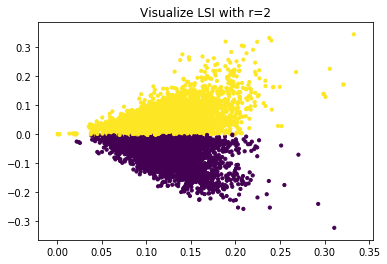

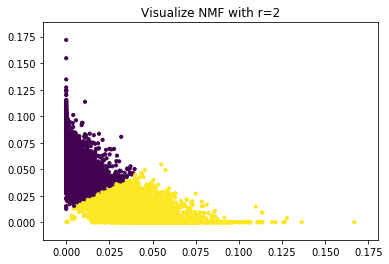

In [16]:
## (4)
##show results with the best current dimension reduction on TruncatedSVD
r=2
LSI=TruncatedSVD(n_components=r)
LSI_data=LSI.fit_transform(tfid)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(LSI_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
plt.figure()
plt.scatter(LSI_data[:,0],LSI_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize LSI with r=2')
##show results with the best current dimension reduction on NMF
r=2
NMF_model=NMF(n_components=r)
NMF_data=NMF_model.fit_transform(tfid)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(NMF_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V_measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("adjusted_rand: %0.3f" % metrics.adjusted_rand_score(train_labels, km.labels_))
print("adjusted_mutual: %0.3f" % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print ('contingency matrix with r= ', r,'\n')
print (contingency)


plt.figure()
plt.scatter(NMF_data[:,0],NMF_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize NMF with r=2')
plt.show()

Homogeneity: 0.227
Completeness: 0.257
V-measure: 0.241
Adjusted rand score: 0.243
Adjusted mutual info score: 0.227
[[1755 2148]
 [3738  241]]


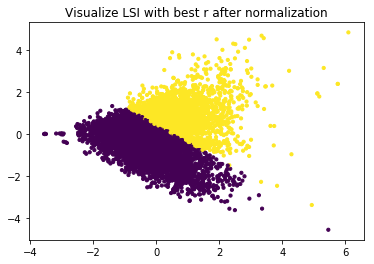

In [33]:
####(4) (b)
## Normalization based on LSI data
best_r=2
LSI_2d=TruncatedSVD(n_components=best_r)
LSI_2d_data=LSI.fit_transform(tfid)
scaler = StandardScaler()
scaler.fit(LSI_2d_data)
LSI_2d_data_NM = scaler.transform(LSI_2d_data)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(LSI_2d_data_NM)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(LSI_2d_data_NM[:,0],LSI_2d_data_NM[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize LSI with best r after normalization')
plt.show()

Homogeneity: 0.575
Completeness: 0.593
V-measure: 0.584
Adjusted rand score: 0.625
Adjusted mutual info score: 0.575
[[3111  792]
 [  33 3946]]


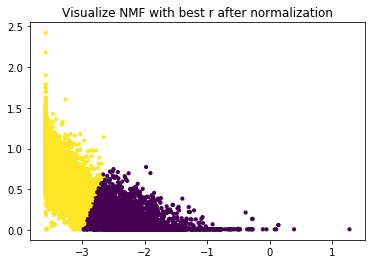

In [34]:
##Normalization based on NMF data
best_r=2

NMF_model=NMF(n_components=best_r)
NMF_data=NMF_model.fit_transform(tfid)
scaler = StandardScaler()
scaler.fit(LSI_2d_data)
NM_data=LSI_2d_data_NM = scaler.transform(NMF_data)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(NM_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(NM_data[:,0],NM_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize NMF with best r after normalization')
plt.show()


Homogeneity: 0.675
Completeness: 0.676
V-measure: 0.676
Adjusted rand score: 0.773
Adjusted mutual info score: 0.675
[[3578  325]
 [ 152 3827]]


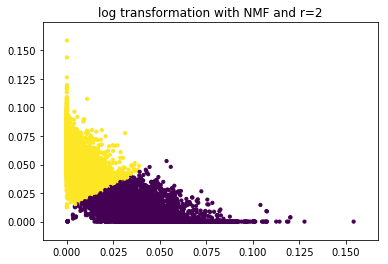

In [38]:
##NMF -> logarithm transformation
NMF_model=NMF(n_components=best_r)
NMF_data=NMF_model.fit_transform(tfid)
log_model = FunctionTransformer(np.log1p)
log_data=log_model.fit_transform(NMF_data)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(log_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(log_data[:,0],log_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('log transformation with NMF and r=2')
plt.show()

In [39]:
##NMF -> normalization -> logarithm transformation
NM_log_data=log_model.fit_transform(NM_data)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(NM_log_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(NM_log_data[:,0],NM_log_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('log transformation with normalized NMF and r=2')
plt.show()


C:\Users\yangq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Homogeneity: 0.684
Completeness: 0.686
V-measure: 0.685
Adjusted rand score: 0.774
Adjusted mutual info score: 0.684
[[ 367 3536]
 [3873  106]]


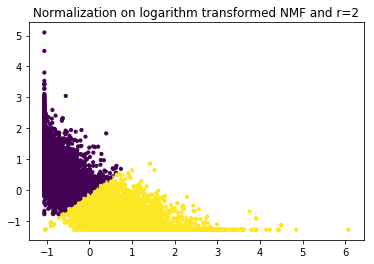

In [40]:
##NMF -> logarithm transformation -> normalization
log_NM_data= scaler.fit_transform(log_data)
km=KMeans(n_clusters=2,n_init=30,init='k-means++',max_iter=100)
km.fit(log_NM_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(log_NM_data[:,0],log_NM_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Normalization on logarithm transformed NMF and r=2')
plt.show()
